<a href="https://colab.research.google.com/github/Hira63S/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/Hira_Khan_DS_Unit_1_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [1]:
# TODO
from google.colab import files
uploaded = files.upload()


Saving crx.data to crx.data


In [0]:
import pandas as pd
import io

columns_names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']

df = pd.read_csv(io.StringIO(uploaded['crx.data'].decode('utf-8')), header = None, names = columns_names)






In [42]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


###So plus represents approved and minue represents -. The numer is correct here. ###

In [0]:
import numpy as np 

In [44]:
df.shape

(690, 16)

In [59]:
df['A16'].value_counts()

-    383
+    307
Name: A16, dtype: int64

In [0]:
df[df['A16'] == '-']

In [0]:
df[df['A16'] == '+']

In [0]:
df = df.replace('?', np.NaN)

In [62]:
df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [63]:
df.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [0]:
df['A2'] = df['A2'].astype(float)

In [0]:
df['A11'] = df['A11'].astype(float)

In [0]:
df['A14'] = df['A14'].astype(float)

In [0]:
df['A15'] = df['A15'].astype(float)

In [71]:
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
import scipy
from scipy.stats import ttest_ind

In [0]:
# TODO

approved = df[df['A16'] == '+']

rejected = df[df['A16'] == '-']


In [73]:
df.describe()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


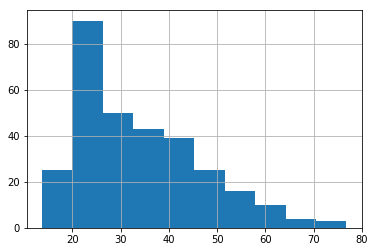

In [120]:
approved['A2'].hist()

Sorry, of it's a little disconcerting but I like impose histogram for visualization.

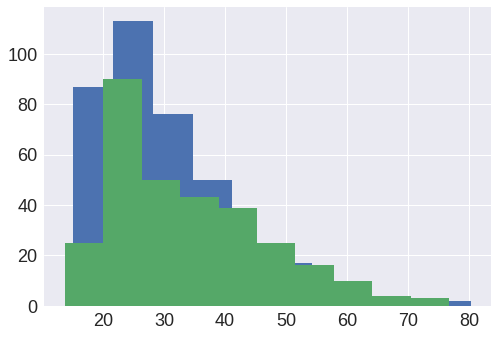

In [202]:
rejected['A2'].hist()
approved['A2'].hist()

In [119]:
print(approved['A2'].mean())
print(rejected['A2'].mean())
print(df['A2'].mean())

33.7204918032787
29.80823056300268
31.56817109144546


In [0]:
first_ttest = (scipy.stats.ttest_ind(approved['A2'], rejected['A2'], nan_policy = 'omit'))

In [83]:
first_ttest

Ttest_indResult(statistic=4.2922156166315535, pvalue=2.0276637071781407e-05)

So we rejected the null-hypothesis here that the two means are equal, the positive t-stat also shows that those who were approved for the credit app had a higher mean with A2 feature than those who were rejected.

In [0]:
second_ttest = (scipy.stats.ttest_ind(approved['A3'], rejected['A3'], nan_policy = 'omit'))

In [86]:
second_ttest

Ttest_indResult(statistic=5.52998337614816, pvalue=4.551680702308068e-08)

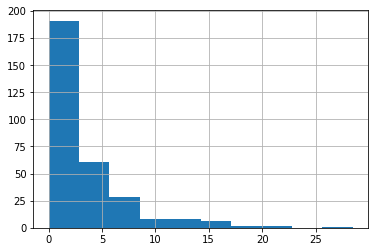

In [124]:
approved['A8'].hist()

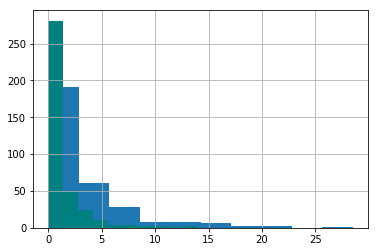

In [123]:
approved['A8'].hist()
rejected['A8'].hist(color='teal')

In [106]:
approved['A8'].value_counts().head(10)

0.00    18
0.04    13
1.50    12
2.50    11
1.75     9
1.00     9
5.00     9
2.00     7
0.25     7
2.25     6
Name: A8, dtype: int64

In [107]:
rejected['A8'].value_counts().head(10)


0.000    52
0.250    28
0.125    25
0.500    23
1.000    22
0.085    21
0.165    20
0.040    20
1.500    13
2.000     9
Name: A8, dtype: int64

In [102]:
print(approved['A8'].mean())
print(rejected['A8'].mean())
print(df['A8'].mean())

3.427899022801302
1.2579242819843346
2.2234057971014476


In [216]:
second_interval_app = confidence_interval(approved['A8'])
second_interval_app

(3.427899022801302, 2.9651124713225334, 3.890685574280071)

In [215]:
second_interval = confidence_interval(df['A8'])
second_interval

(2.223405797101449, 1.9732677929234224, 2.4735438012794755)

In [0]:
third_ttest = (scipy.stats.ttest_ind(approved['A8'], rejected['A8'], nan_policy = 'omit'))

In [93]:
third_ttest

Ttest_indResult(statistic=8.935819983773698, pvalue=3.6710537401601785e-18)

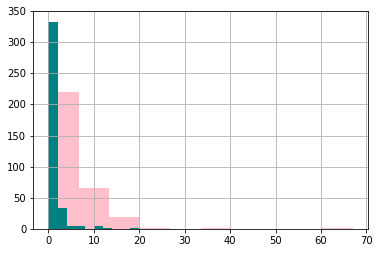

In [127]:
approved['A11'].hist(color = 'pink')
rejected['A11'].hist(color='teal')

In [218]:
rejected['A11'].value_counts().head(10)
approved['A11'].value_counts().head(10)

0.0     98
1.0     35
6.0     20
3.0     20
2.0     19
11.0    18
5.0     16
7.0     15
4.0     12
8.0     10
Name: A11, dtype: int64

In [125]:
print(approved['A11'].mean())
print(rejected['A11'].mean())
print(df['A11'].mean())

4.605863192182411
0.6318537859007833
2.4


In [0]:
fourth_ttest = (scipy.stats.ttest_ind(approved['A11'], rejected['A11'], nan_policy = 'omit'))

In [94]:
fourth_ttest

Ttest_indResult(statistic=11.667004222431277, pvalue=7.957718568079967e-29)

In [0]:
fifth_ttest = (scipy.stats.ttest_ind(approved['A14'], rejected['A14'], nan_policy = 'omit'))

In [95]:
fifth_ttest

Ttest_indResult(statistic=-2.6358251986645476, pvalue=0.008586135473979569)

In [114]:
rejected['A15'].value_counts().sum()

383

In [115]:
approved['A15'].value_counts().sum()

307

In [109]:
print(approved['A15'].mean())
print(rejected['A15'].mean())
print(df['A15'].mean())

2038.85993485342
198.60574412532637
1017.3855072463768


In [0]:
sixth_ttest = (scipy.stats.ttest_ind(approved['A15'], rejected['A15'], nan_policy = 'omit'))

In [97]:
sixth_ttest

Ttest_indResult(statistic=4.680216020964486, pvalue=3.4520256956287944e-06)

In [133]:
sixth_2_ttest = (scipy.stats.ttest_1samp(approved['A15'], 0.5, nan_policy = 'omit'))
sixth_2_ttest

Ttest_1sampResult(statistic=4.6626699683205315, pvalue=4.668167713773681e-06)

In [0]:
from scipy import stats

def confidence_interval(data, confidence= 0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1+confidence) /2.,n-1)
  return(mean, mean - interval, mean + interval)
                 

In [0]:
conf_int = confidence_interval(approved['A15'])

In [137]:
conf_int

(2038.85993485342, 1178.6283209729409, 2899.0915487338993)

#Categorical Variables#



For the categorical features, explore by creating "cross tabs" (aka contingency tables) between them and the class label, and apply the Chi-squared test to them. pandas.crosstab can create contingency tables, and scipy.stats.chi2_contingency can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

In [138]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


#Feature A5#

In [139]:
df['A5'].value_counts()

g     519
p     163
gg      2
Name: A5, dtype: int64

In [140]:
contingency_table = pd.crosstab(
    df['A16'],
    df['A5'],
    margins = True)

contingency_table

A5,g,gg,p,All
A16,,,,
+,256,2,45,303
-,263,0,118,381
All,519,2,163,684


So consumers with g on their report were roughly approved half the time and rejected hlf the time but those with p on their file were rejected more like double the time. 

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

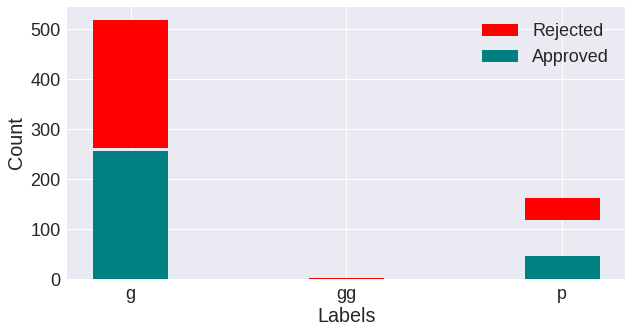

In [150]:
approve_count = contingency_table.iloc[0][0:3].values
reject_count = contingency_table.iloc[1][0:3].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["g","gg","p"]
p1 = plt.bar(categories, approve_count, 0.35, color='teal')
p2 = plt.bar(categories, approve_count, 0.35, bottom=reject_count, color = 'red')
plt.legend((p2[0], p1[0]), ('Rejected', 'Approved'))
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [0]:
table1 = contingency_table = pd.crosstab(
    df['A16'],
    df['A5'])

In [155]:
table1

A5,g,gg,p
A16,,,
+,256,2,45
-,263,0,118


In [154]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(table1)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 26.234074966202144
P-value: 2.010680204180363e-06
Degrees of Freedom: 2
Expected: 
 [[229.90789474   0.88596491  72.20614035]
 [289.09210526   1.11403509  90.79385965]]


Here we reject the null hypothesis that there is no significant relationship between the two variables. The variables of 'g', 'gg, 'p' found in Column A5 and A16. (maybe because of the 118 customers with 'p' having their credit apps rejected?)

#Feature A13#

In [156]:
df['A13'].value_counts()

g    625
s     57
p      8
Name: A13, dtype: int64

In [158]:
tableA13 = pd.crosstab(df['A16'], df['A13'], margins = 'True')
tableA13

A13,g,p,s,All
A16,,,,
+,287,5,15,307
-,338,3,42,383
All,625,8,57,690


In [164]:
table_A13_b = pd.crosstab(df['A16'], df['A13'], margins = 'True')
table_A13_b

A13,g,p,s,All
A16,,,,
+,287,5,15,307
-,338,3,42,383
All,625,8,57,690


In [165]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(table_A13_b)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))


Chi-Squared: 9.191570451545383
P-value: 0.16308747114208172
Degrees of Freedom: 6
Expected: 
 [[278.07971014   3.55942029  25.36086957 307.        ]
 [346.92028986   4.44057971  31.63913043 383.        ]
 [625.           8.          57.         690.        ]]


A non-significant p-value, finally! So we fail to reject the null hypothesis here. 

For the Chi squared tests, the null is that there is no significance relationship between these two categorical variable. 

In [181]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


In [187]:
df['A7'].value_counts()

v     399
h     138
bb     59
ff     57
z       8
j       8
dd      6
n       4
o       2
Name: A7, dtype: int64

In [188]:
approved['A7'].value_counts()


v     169
h      87
bb     25
ff      8
z       6
j       3
n       2
dd      2
o       1
Name: A7, dtype: int64

In [189]:
rejected['A7'].value_counts()

v     230
h      51
ff     49
bb     34
j       5
dd      4
z       2
n       2
o       1
Name: A7, dtype: int64

In [190]:
table_A4 = pd.crosstab(df['A16'], df['A7'], margins = 'True')
table_A4

A7,bb,dd,ff,h,j,n,o,v,z,All
A16,,,,,,,,,,
+,25,2,8,87,3,2,1,169,6,303
-,34,4,49,51,5,2,1,230,2,378
All,59,6,57,138,8,4,2,399,8,681


In [195]:
df['A5'].isnull().sum()

6

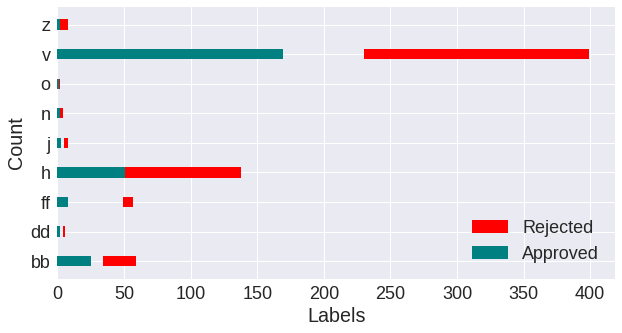

In [200]:
approve_count = table_A4.iloc[0][0:9].values
reject_count = table_A4.iloc[1][0:9].values

#Plots the bar chart
fig = plt.figure(figsize=(10, 5))
sns.set(font_scale=1.8)
categories = ["bb","dd","ff", "h", "j", "n", "o", "v", "z"]
p1 = plt.barh(categories, approve_count, 0.35, color='teal')
p2 = plt.barh(categories, approve_count, 0.35, left=reject_count, color = 'red')
plt.legend((p2[0], p1[0]), ('Rejected', 'Approved'))
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [223]:
table_A7_a = pd.crosstab(df['A16'], df['A7'])
table_A7_a

A7,bb,dd,ff,h,j,n,o,v,z
A16,,,,,,,,,
+,25,2,8,87,3,2,1,169,6
-,34,4,49,51,5,2,1,230,2


In [224]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(table_A7_a)


print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 45.034207140240554
P-value: 3.625452872372267e-07
Degrees of Freedom: 8
Expected: 
 [[ 26.25110132   2.66960352  25.36123348  61.40088106   3.55947137
    1.77973568   0.88986784 177.52863436   3.55947137]
 [ 32.74889868   3.33039648  31.63876652  76.59911894   4.44052863
    2.22026432   1.11013216 221.47136564   4.44052863]]


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

#Numerical Variables#

-Features: A2, A3, A8, A11, A14, A15

So I divided the variables by class from the last columns. Those who got approved were put in a approved category and these not approved were put in rejected category. 

  Ran a 2-sample t-test to see if the mean was the same for those who got approved and those who got rejected with feature A2. The t-test output a p-value of 2.02e-2 leading us to reject the null hypothesis that the mean for those with A2 feature was the same for those who were rejected and those whose application were accepted.
   The t-test also gave a t-statistic of +5.53 indicating that those with feature A2 had a higher approval average.

###Second t-test###

  The second t-test was performed with A11 feature and it showed that it was significant with a p-value of 7.95e-29 and a big t-statistic of 11.67. This was also indicated from the huge difference in the average of those approved with this feature and those who got rejected.
    As the histogram shows, there were a lot more people with a value of 0.00 who got rejected than those who were accepted. But considerable number of people, especially with value between 0 to 1 for this feature were accepted for their credit application. 
   

#Categorical Variables

###First Chi-Squared test###
- The first Chi-squared test was performed on the categorical feature of A5, with categories of 'g', 'gg', 'p'. The 'g' category had roughly the same number of people accepted and rejected with their credit application. However, 'p' category had roughly 3 times as many rejections as acceptances. The Chi-Squared test lead to rejection of the null hypothesis that there is no significant relationship between the two variables, with a p-value of 2.01e-06. The Chi-squared was also significant with a value of 26.23, with 2 degrees of freedom.

##Second Chi-Squared test##

- The second Chi-Squared test was performed between A7 feature with 9 categorical variables and there was a big difference in number of those in 'v' category to be approved or rejected for the credit application.
  The Chi squared test revealed that a Chi-Squared statistic of 45.034207140240554 and a significant p-value of 3.62e-07. The test lead us to reject the null hypothesis that there is no statistically significant relationship between the two categorical variables. 

#Challenging part#

It might be misunderstanding on my part if I didn't acknowledge all the parts I was supposed to cover but I don't think this challenge was challenging at all.
The only thing was too many t-tests and a little bit lengthy but other than that, it was easy. Another little challenge was explaining the findings. Even though I know what each test is for and what each value indicates, I was unsure about how much depth to go in considering I used to write 20 pages results sections for lab reports in statistics class in college. :-)

In [0]:
def confidence_intervals(data, confidence=0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2., n - 1)
  return (interval)

In [0]:
new_df = pd.DataFrame(columns=['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A16'])

In [0]:
new_df['A2'] = new_df['A2'].astype(float)

In [0]:
new_df['A3'] = new_df['A3'].astype(float)

In [0]:
new_df['A8'] = new_df['A8'].astype(float)

In [0]:
new_df['A11'] = new_df['A11'].astype(float)

In [0]:
new_df['A14'] = new_df['A14'].astype(float)

In [0]:
new_df['A15'] = new_df['A15'].astype(float)

In [256]:
new_df.dtypes

A2     float64
A3     float64
A8     float64
A11    float64
A14    float64
A15    float64
A16     object
dtype: object

In [241]:
new_df.isnull().sum()

A2     0
A3     0
A8     0
A11    0
A14    0
A15    0
A16    0
dtype: int64